# TP1 : Distribution du tirage de dés
### Auteur : ARGUELLO Camilo


## Introduction

L'objetfif de ce TP, c'est de faire une expérience simple à fin de se familiariser avec les notions de probabilités et de distributions. Pour cela, nous allons étudier le comportement d'un dé ayant une probabilité uniforme de tomber sur une des à 6 faces. Nous allons étudier la distribution du pipage d'un dé, la distribution de la somme de $N$ dés et la distribution de la fréquence d'apparition d'une valeur pour un tirage de dés.

Pour les calcules, on va utiliser la librairie `numpy` pour les calcules numériques et `matplotlib` pour les graphiques, ainsi que `random` pour les tirages aléatoires.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Estimation du pipage d'un dé
### 1.1. Tirage et remplissage de listes

Pour commencer, nous allons effectuer plusieurs lancers d'un dé à six faces pour vérifier s'il est pipé. Nous savons que la moyenne théorique est $$\mu = \frac{1+2+3+4+5+6}{6} = 3.5$$

*Nous garderons un chiffre significatif pour nos calculs.*

In [2]:
valeurs = [6, 5, 5, 6, 3, 3, 2, 3, 2, 5, 6, 3, 2, 4, 5, 6, 4, 2, 1, 3, 1, 1, 4, 1, 5]
print("Valeurs obtenues après " + str(len(valeurs)) + " lancers de dés")

# Calcul de la moyenne
def moyenne(valeurs):
    """
    @param {int} valeurs
    """
    moyenne = 0
    for num in valeurs:
        moyenne += num
    return moyenne / len(valeurs)

print("Moyenne: {:.1f}".format(moyenne(valeurs)))

Valeurs obtenues après 25 lancers de dés
Moyenne: 3.5


En faisant la moyenne on voit que la valeur théorique est donc égale à celle trouvée par la méthode. On peut le voir visuellement dans le graphique ci-dessous.

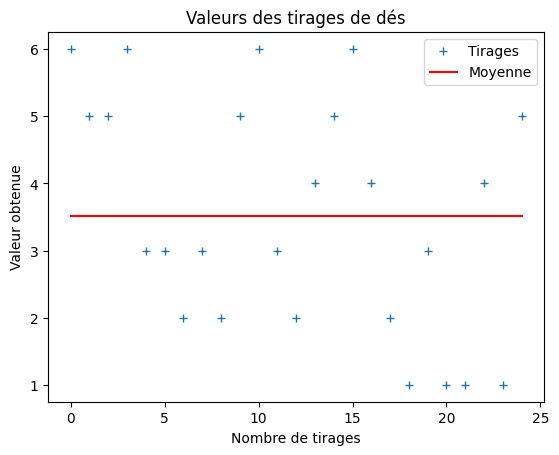

In [3]:
plt.plot(valeurs, '+', label='Tirages')
plt.plot([moyenne(valeurs)] * len(valeurs), 'r', label='Moyenne')
plt.title('Valeurs des tirages de dés')
plt.xlabel('Nombre de tirages')
plt.ylabel('Valeur obtenue')
plt.legend()
plt.show()

De même, on peut calculer la moyenne sur la somme de chaque paire des valeurs. Par example `6+5`, `5+6`, `3+3`, `2+3`... etc. Ce qui nous donnera comme valeur attendue le double de la moyenne obtenue précédemment, dans ce cas $ 3.5 \times 2 = 7 $.

somme 12
Moyenne paire: 6.9
somme 12


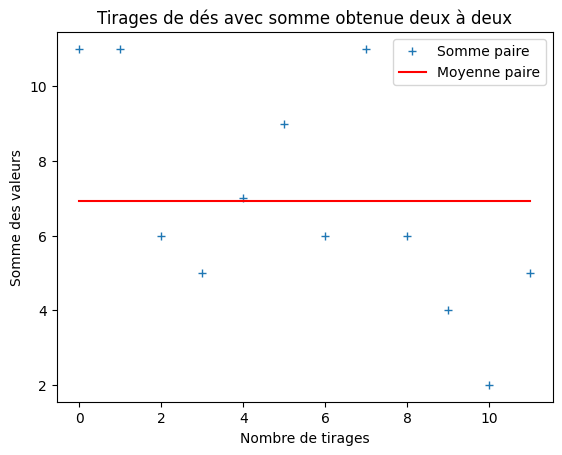

In [4]:
def list_somme_paire(valeurs):
    """
    Calcul de la somme de chaque paire des tirages
    """
    somme = []
    for i in range(0, len(valeurs) - 1, 2):
        somme.append(valeurs[i] + valeurs[i+1])
    return somme


def moyenne_paire(valeurs):
    """
    Calcul de la moyenne sur la list_somme_paire
    """
    somme = list_somme_paire(valeurs)
    moyenne = 0
    print("somme", len(somme))
    for num in somme:
        moyenne += num
    return moyenne / len(somme)


print("Moyenne paire: {:.1f}".format(moyenne_paire(valeurs)))

plt.plot(list_somme_paire(valeurs), '+', label='Somme paire')
plt.plot([moyenne_paire(valeurs)] * len(list_somme_paire(valeurs)), 'r', label='Moyenne paire')
plt.title('Tirages de dés avec somme obtenue deux à deux')
plt.ylabel('Somme des valeurs')
plt.xlabel('Nombre de tirages')
plt.legend()
plt.show()

Le graphique montre que la somme des valeurs moyennes des lancers se situe très près de la valeur `7`, ce qui concorde avec les valeurs théoriques attendues. Cependant ces valeurs ne montrent pas s'il le dé, il est pipé ou pas. Pour vérifier cette hypothèse, nous définirons la distribution des lancers d'un dé à $N$ faces à la fin du TP.

### 1.2. Calcul des probabilités de tirage et création d'histogrammes

Pour obtenir une meilleure représentation de la distribution des valeurs, dans le cadre du tirage de dés, nous calculons la fréquence d'apparition $f_i$ de chaque valeur, où $f_i$ est défini comme le rapport entre le nombre de fois où la valeur $i$ est apparue et le nombre total de tirages. Nous nous attendons à obtenir $f_n = \frac{1}{6} \approx 0.16$.

In [5]:
def calcul_frequence (valeurs):
    """
    Calcul de la fréquence d'apparition de chaque valeur
    """
    frequence = []
    for i in range(1, 7):
        # Python List.count() method returns the count of how many times a given object occurs in a List.
        frequence.append(valeurs.count(i) / len(valeurs)) # f_i
    return frequence

print("Fréquence d'apparition: " + str(calcul_frequence(valeurs)))

Fréquence d'apparition: [0.16, 0.16, 0.2, 0.12, 0.2, 0.16]


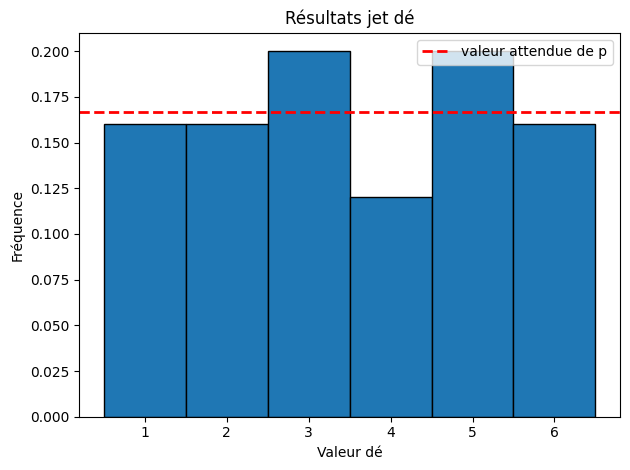

In [6]:
# Création de la figure et des axes
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True) # Ajout de l'histogramme
n_valeurs, _, _ = axs.hist(valeurs, bins=np.arange(0.5, 7.5, 1), ec="black", density=True)
plt.axhline(1/6, color='red', linestyle='dashed', linewidth=2, label="valeur attendue de p")
axs.set_title("Résultats jet dé")
axs.set_ylabel("Fréquence")
axs.set_xlabel("Valeur dé")
plt.legend()
plt.show()

On fait la verification si les valeurs trouvées dans l'histogramme `n_valeurs` sont les mêmes que celles calculées avec la fonction `calcul_frequence()`.

In [7]:
print(calcul_frequence(valeurs) == n_valeurs)

[ True  True  True  True  True  True]


On calcule les écarts entre la fréquence $f_n$ et la probabilité attendue $p=\frac{1}{6}$. *Nous allons utiliser 3 chiffres significatifs.*

In [8]:
def calcul_ecart_valeurs_frequence(valeurs):
    """
    Calcul de l'écart entre la fréquence et la probabilité attendue
    """
    ecart = []
    p = 1 / 6 # probabilité attendue
    for i in range(6):
        ecart.append(np.abs(calcul_frequence(valeurs)[i] - p))
    return ecart

## On calcule la moyenne des écarts
def moyenne_ecarts_valeurs_frequence(valeurs):
    """
    Calcul de la moyenne des écarts
    """
    ecart = calcul_ecart_valeurs_frequence(valeurs)
    moyenne = 0
    for num in ecart:
        moyenne += num
    return moyenne / len(ecart)

ecarts = [round(num, 3) for num in calcul_ecart_valeurs_frequence(valeurs)]
print("Frequence écart-type", str(ecarts) )
print("Moyenne des écarts: {:.3f}".format(moyenne_ecarts_valeurs_frequence(valeurs)))

Frequence écart-type [0.007, 0.007, 0.033, 0.047, 0.033, 0.007]
Moyenne des écarts: 0.022


D'après les résultats, on constate que l'écart entre la fréquence observée et la probabilité théorique est très faible. Par conséquent, il semble raisonnable de penser que le dé n'est pas pipé. De même, on observe un biais significatif en faveur de certaines valeurs (comme le 3 ou le 5).

## 2. Génération de tirage d'un dé

Dans cette partie, on va utiliser un générateur de nombres aléatoires avec la fonction `random.uniform` pour simuler le lancer d'un dé.

### 2.1. Tirage de dé avec `random`

On va utiliser quelques fonctions qui vont rendre nos calculs un peu plus simples. Notre objectif c'est de générer 1.000.000 tirages de nombres aléatoires. On s'attend toujours à que la frequence d'apparition soit la même $f_n$ trouvée dans la question précédente.

In [9]:
import random

In [10]:
def create_liste(N):
    """
    Création d'une liste de N valeurs aléatoires entre 0 et 1
    Retourne la liste
    """
    liste = []
    for i in range(0, N):
        liste.append(random.uniform(0, 1))
    return liste

def calcul_frequence_apparition(n,liste):
    """
    Calcul de la fréquence d'apparition de chaque valeur dans une liste
    """
    frequence = []
    for i in range(6):
      frequence.append(n[i] / len(liste))
    return frequence

def calcul_ecart_apparition(valeurs):
    """
    Calcul de l'écart entre la fréquence et la probabilité attendue
    """
    ecart = []
    p = 1 / 6
    for i in range(6):
        ecart.append(np.abs(valeurs[i] - p))
    return ecart

def ecart_moyen_apparition(n, liste):
    """
    Calcul de l'écart moyen absolu selon entre la frequence et la probabilité
    """
    ecart = []
    p = 1 / 6
    for i in range(6):
        ecart.append(np.abs(calcul_frequence_apparition(n, liste)[i] - p))
    return np.sum(ecart)

def histogramme(liste, bins, N=1000):
    """
    Affichage de l'histogramme
    Retourne les valeurs de l'histogramme (n), les bornes des bins (bins) et les patches
    """
    # On range les valeurs dans un histogramme à 6 bins
    n, bins, patches = plt.hist(liste, bins, ec="black")
    plt.title("Distribution de " + str(N) + " de nombres aléatoires sur l'intervalle [0,1]")
    plt.ylabel("Nombre d'apparitions")
    plt.xlabel("valeur entre 0 et 1")
    plt.show()
    return n, bins, patches

def get_hist_not_graph(liste, bins=6, N=1000):
    """
    Cette fonction permet de récupérer les valeurs de l'histogramme sans afficher le graphique
    Retourne les valeurs de l'histogramme (n), les bornes des bins (bins) et les patches
    """
    # On range les valeurs dans un histogramme à 6 bins
    n, bins, patches = plt.hist(liste, bins=bins, ec="black")
    # on ne veut pas afficher le graphique
    plt.close()
    return n, bins, patches

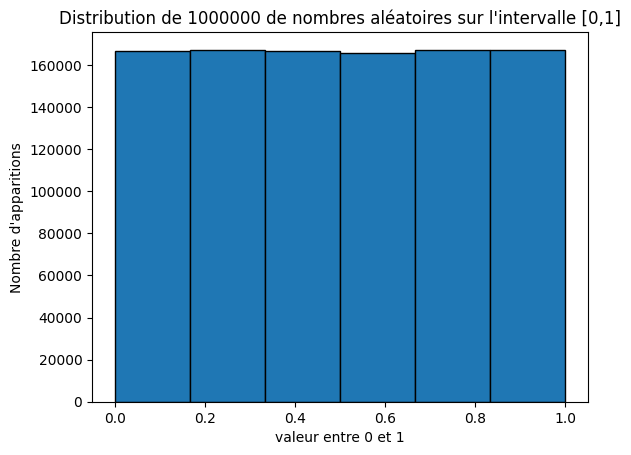

Frequence pour chaque dé ['0.167', '0.167', '0.167', '0.166', '0.167', '0.167']
Moyenne de la fréquence: 0.167
Ecart moyen: 0.002


In [11]:
N=int(1e6) # Nombre de lancers de dés
liste = create_liste(N)
n, bins, _ = histogramme(liste, np.linspace(0, 1, 7), N=N) # On range les valeurs dans un histogramme à 6 bins
frequence = calcul_frequence_apparition(n, liste) # fréquence d'apparition
print("Frequence pour chaque dé", [f"{value:.3f}" for value in frequence])
print("Moyenne de la fréquence: {:.3}".format(moyenne(frequence)))
print("Ecart moyen: {:.3f}".format(ecart_moyen_apparition(n, liste)))

La fréquence d'apparition des valeurs est bien égale à la valeur attendue de $f_n$. De plus, on remarque que la valeur moyenne des écarts est plus petite que celle trouvée dans la question précédente. En prenant différentes tailles de $n$, on s'attend toujours à avoir un écart moyen qui ne varie pas trop entre les différentes valeurs.

In [12]:
Ns = [20, 40, 100]

for N in Ns:
  liste = create_liste(N)
  n, bins, _ = get_hist_not_graph(liste, N=N) # calcul de l'histogramme
  frequence = calcul_frequence_apparition(n, liste) # fréquence d'apparition
  print("Pour N =", N)
  print("Moyenne de la fréquence: {:.3}".format(moyenne(frequence)))
  print("Ecart moyen: {:.3f} \n".format(ecart_moyen_apparition(n, liste)))

Pour N = 20
Moyenne de la fréquence: 0.167
Ecart moyen: 0.467 

Pour N = 40
Moyenne de la fréquence: 0.167
Ecart moyen: 0.250 

Pour N = 100
Moyenne de la fréquence: 0.167
Ecart moyen: 0.100 



On observe effectivement que la fréquence est égale à $f_n$, tandis que l'écart moyen varie et tend vers des valeurs plus petites. Ceci suggère que, avec une taille de lancers supérieure, nous pouvons nous attendre à une diminution continue de l'écart.

In [13]:
# On calcule l'écart moyen et sa variation
def ecart_moyen_variation(N):
    """
    Calcul de l'écart moyen et sa variation
    """
    liste = create_liste(N)
    n, bins, _ = get_hist_not_graph(liste)
    return ecart_moyen_apparition(n, liste)

In [14]:
end=1000
start=1
step=1
N = np.arange(start, end, step)

ecart_moyen = []
for i in N:
  ecart_moyen.append(ecart_moyen_variation(i))

In [15]:
## Regression lineare
coefficients = np.polyfit(np.log(N), np.log(ecart_moyen), 1)
#  slope (m), intercept (b)
slope, intercept = coefficients
# values en log
regression_y_log = slope * np.log(N) + intercept
# original scale
regression_y = np.exp(regression_y_log)

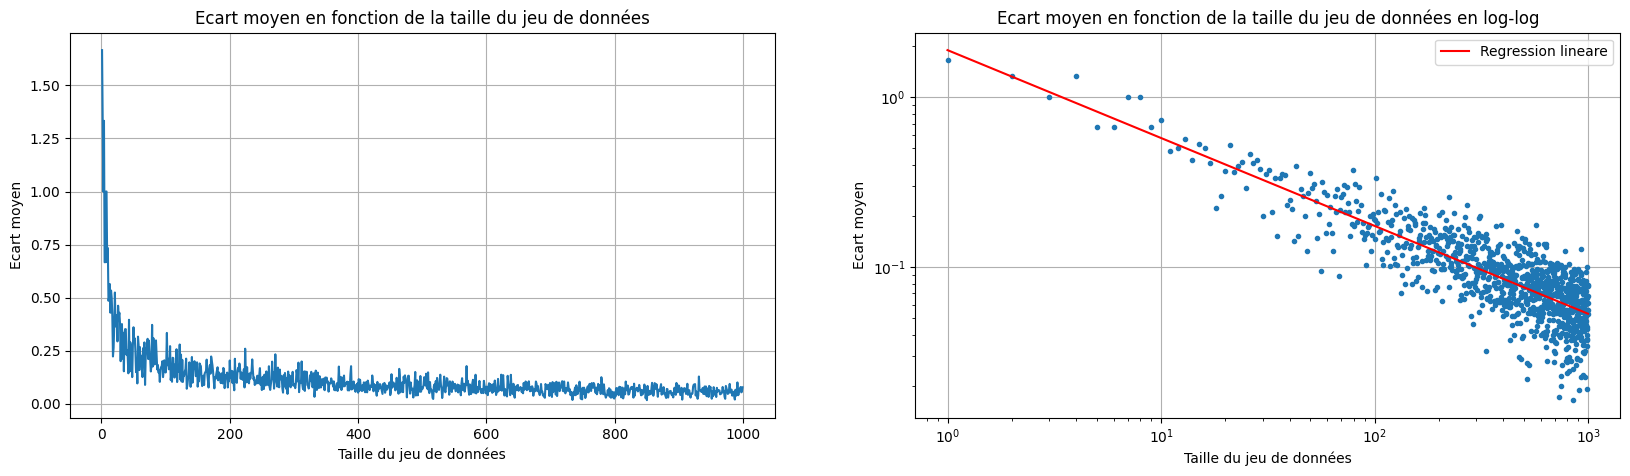

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

ax1.plot(N, ecart_moyen)
ax1.set_title("Ecart moyen en fonction de la taille du jeu de données")
ax1.set_ylabel("Ecart moyen")
ax1.set_xlabel("Taille du jeu de données")
ax1.grid()
ax2.plot(N, ecart_moyen, ".")
ax2.plot(N, regression_y, color='red', label='Regression lineare')
ax2.set_title("Ecart moyen en fonction de la taille du jeu de données en log-log")
ax2.set_ylabel("Ecart moyen")
ax2.set_xlabel("Taille du jeu de données")
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.grid()
plt.legend()
plt.show()

In [17]:
print("Pente {:.3} Intercept {:.3}".format(slope, intercept))

Pente -0.517 Intercept 0.639


D'après le graphique, il est clair que l'écart moyen tend à diminuer lorsque le nombre de tirages augmente. Cela suggère que les estimations des écarts moyens deviennent plus précises à mesure que la quantité de données augmente. Cette observation est confirmée par le graphique en échelle logarithmique où une relation décroissante (pente négative = $-0.517$) entre le nombre de jeux de données et l'écart moyen est visible.

### 2.2. Distribution de sommes de dés

Maintenant, on va étudier la distribution de la somme des valeurs obtenues lorsque le nombre de dés augmente. Pour cela, on va créer une fonction qui a comme objectif sommer de $k$ en $k$ les valeurs à $N$ tirages.

In [18]:
def calcul_yi(x, k):
    """
    Calcul de y_i = \sum_{j=i*k}^{(i+1)*k-1} x_i
    Exemple: Pour une liste x = [1, 1, 2, 3, 4, 1, 1, 1], k=2
    On fait :   y_0 = x_0 + x_1 = 1 + 1 = 2
                y_1 = x_2 + x_3 = 2 + 3 = 5
                y_2 = x_4 + x_5 = 4 + 1 = 5
                y_3 = x_6 + x_7 = 1 + 1 = 2
    Pour n=3, on peut faire la somme:
                y_0 = x_0 + x_1 + x_2 = 1 + 1 + 2 = 4
                y_1 = x_3 + x_4 + x_5 = 3 + 4 + 1 = 8
                ...
    On obtient pour k=2 : y = [2, 5, 5, 2]
    Retourne une liste de y_i
    """
    y = []
    for i in range(0, len(x), k): # or range(len(x) - n + 1)
        y.append(np.sum(x[i:i+k]))
    return y

def frequence_apparition_dans_y_i(y):
    """
    On calcule la fréquence d'apparition de chaque valeur dans y_i, c'est à dire le nombre de fois qu'une valeur est répétée dans y_i
    Exemple: y = [2, 5, 5, 3]
    On a:    y_0 = 2, y_1 = 5, y_2 = 5, y_3 = 3
    Alors, on retourne une liste de la même taille que y, mais avec les valeurs de fréquence d'apparition
    On obtient: [1, 2, 2, 1]
    Retourne une liste de fréquence d'apparition
    """
    frequences = {}
    for valeur in y:
        if valeur in frequences:
            frequences[valeur] += 1
        else:
            frequences[valeur] = 1
    return [frequences.get(valeur, 0) for valeur in y]

def reshape_yi(listA,listB):
    """
    Cette fonction permets de combiner deux listes, quand la valeur de listA est répétée, on garde juste une valeur.
    L'objective c'est de avoir deux listes de même taille, mais avec des valeurs de y_i et la fréquence d'apparition.

    Exemple: listA = [2, 2, 4, 4, 6, 6, 8, 9, 11, 12] et listB=[2, 2, 2, 2, 2, 2, 1, 1, 1, 1].
    # Où, listA contient les valeurs de y_i et listB contient les valeurs de fréquence d'apparition
    On obtient: listC = [2, 4, 6, 8, 9, 11, 12] et listD = [2, 2, 2, 1, 1, 1, 1]
    # Où, listC contient les valeurs uniques de y_i et listD contient les valeurs uniques de fréquence d'apparition

    Retourne deux listes
    """
    # to combine two list, when the value of listA is repeated, we just keep one value
    listC = list(set(listA) | set(listB))
    # remove the value of listC that are not in listA
    listC = [i for i in listC if i in listA]
    # get the index of the value in listA
    listD = [listA.index(i) for i in listC]
    # get the value of listB
    listE = [listB[i] for i in listD]
    return listC, listE


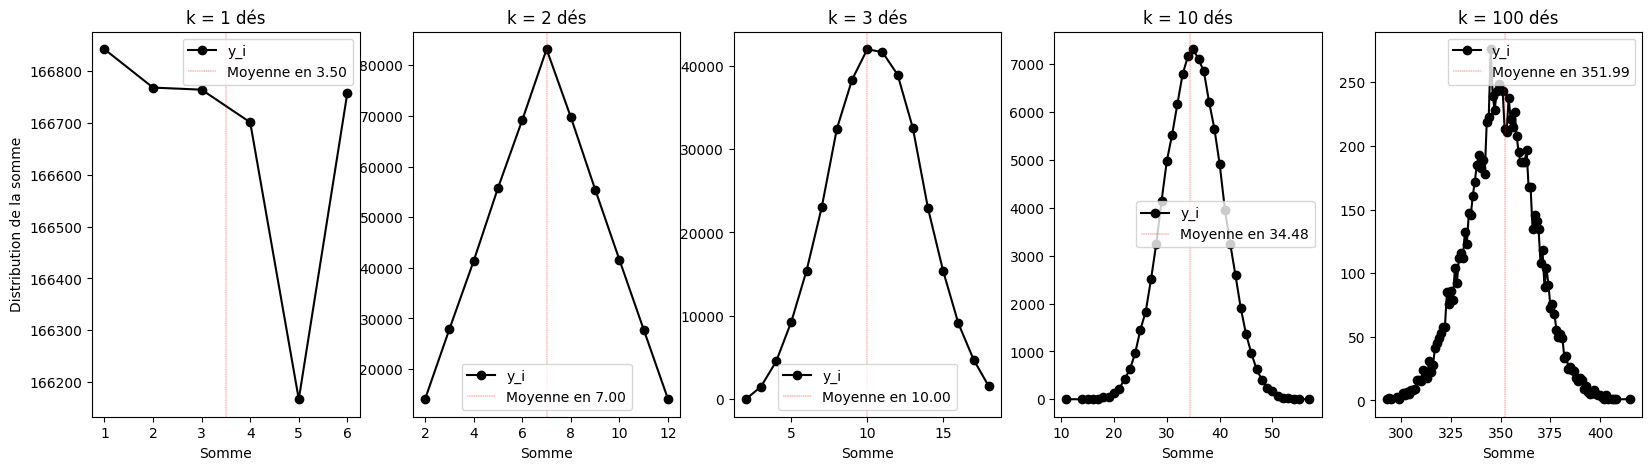

In [19]:
N=int(1e6)
valeurs_k = [1, 2, 3, 10, 100]
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20, 5))
axes = [ax1, ax2, ax3, ax4, ax5]
axes[0].set_ylabel("Distribution de la somme")

for i in range(len(valeurs_k)):
    k = valeurs_k[i]                                            # nombre de dés
    x = np.random.randint(1, 7, N)                              # tirage aléatoire de N valeurs entre 1 et 6
    y = calcul_yi(x, k)                                         # calcul de y_i
    frequence = frequence_apparition_dans_y_i(y)                # calcul de la fréquence d'apparition de chaque valeur dans y_i
    X,Y = reshape_yi(y,frequence)                               # on obtient les valeurs uniques de X et Y
    axes[i].plot(X,Y,"o-", color="black", label="y_i")          # distribution
    axes[i].axvline(x=np.mean(X), color="red", label="Moyenne en {:.2f}".format(np.mean(X)) , linestyle="--", linewidth=.3) # moyenne droite
    axes[i].set_title("k = {} dés".format(k))
    axes[i].set_xlabel("Somme")
    axes[i].legend()


Dans le graphique ci-dessus, il est remarquable que plus le nombre de dés augmente, plus la somme des dés augmente également, avec une valeur centrée autour de la moyenne $\mu \times k$ (avec $\mu = 3.5$). De plus, la distribution devient de plus en plus normale ou gaussienne. Lorsque $k = 1$, on revient au premier cas où certaines valeurs du dé peuvent apparaître plus fréquemment que d'autres. Cependant, à partir de la valeur $k = 2..100$, il est évident que les résultats des tirages de plusieurs dés deviennent de plus en plus uniformes.

## Conclusion

Dans le cadre de ce TP, nous avons eu l'opportunité d'explorer divers concepts abordés en cours à travers un exemple de lancer de dés.

En examinant différents scénarios, tels que le lancer d'un dé, le lancer répété d'un dé, ou encore le lancer simultané de plusieurs dés, nous avons pu confirmer la relation entre la fréquence d'apparition des valeurs et la probabilité d'apparition. Autrement dit, nous avons constaté que plus le nombre de tirages est élevé, plus l'écart entre la probabilité théorique et la fréquence observée tend vers 0.

De même on a pu trouver la relation entre la distribution de la fréquence d'appartition de la somme pour $k$ dés. Où la valeur moyenne est toujours centrée en $\mu \times k$ avec une distribution normale lors de $k > 2$.